# Explorative data analysis on Ropecon 2022 data

## Imports

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from read_data import read_data, get_all_usernames
%matplotlib widget

In [2]:
signedGames = read_data('users')
userSignups = read_data('signups')
results = read_data('results')
games = read_data('games')
usernames = get_all_usernames()

In [3]:
signedGames.head()

,priority,time,gameDetails.gameId,username,userGroup,serial,groupCode,createdAt,updatedAt
0,1,2022-07-31T07:00:00Z,p5349,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
1,1,2022-07-31T10:00:00Z,p5351,794300,user,6624939010,0,2022-07-29T11:13:42.151Z,2022-07-31T08:00:37.262Z
2,1,2022-07-30T14:00:00Z,p5671,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
3,3,2022-07-30T07:00:00Z,p5171,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z
4,1,2022-07-30T07:00:00Z,p5575,74166,user,1926604032,0,2022-07-29T12:00:34.568Z,2022-07-30T16:00:34.809Z


In [4]:
userSignups.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z


In [5]:
len(userSignups.username.unique())

666

In [6]:
results.head()

,username,enteredGame.gameDetails.gameId,enteredGame.priority,enteredGame.time,startTime,algorithm,message,updatedAt,createdAt
0,804595,p5263,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
1,451394,p5263,2,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
2,799060,p5414,3,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
3,254323,p5414,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z
4,99090,p5664,1,2022-07-29T15:00:00Z,2022-07-29T15:00:00Z,padg,"Padg Assign Result - Players: 8/12 (67%), Game...",2022-07-29T13:00:10.946Z,2022-07-29T13:00:10.946Z


In [7]:
games.head()

,gameId,accessibilityValues,contentWarnings,createdAt,description,endTime,gameSystem,genres,language,location,...,people,popularity,programType,revolvingDoor,shortDescription,startTime,styles,tags,title,updatedAt
0,p5081,[remainingOnePlace],,2022-07-17T19:54:20.195Z,Nyt pääsevät haasteesta kiinnostuneet Commande...,2022-07-29T19:00:00Z,Magic the Gathering (Formaatti: Commander),[],fi,Halli 3 Turnaussali,...,"Arno Laine, Valtteri Hyyppä",0,tournament,False,,2022-07-29T13:00:00Z,[],"[inEnglish, forAdults, tournament]",Magic the Gathering: Commander (cEDH) Double E...,2022-08-02T13:00:04.587Z
1,p5644,[],Vampires,2022-07-17T19:54:20.194Z,"No longer actually a qualifier, but we're keep...",2022-07-29T14:30:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, tournament]",VTES: Last Chance Qualifier (LCQ),2022-08-02T13:00:04.587Z
2,p5659,[],Vampyyrit | Vampires,2022-07-17T19:54:20.195Z,HUOMAA ETTÄ PERJANTAIN ALOITTELIJATURNAUS TURN...,2022-07-29T14:00:00Z,Vampire: The Eternal Struggle (VTES),[],fi,Sali 208,...,,0,tournament,False,,2022-07-29T06:30:00Z,[],"[inEnglish, beginnerFriendly, tournament]",VTES: Perjantain aloittelijaturnaus | VTES: Be...,2022-08-02T13:00:04.586Z
3,p5117,[],"väkivalta, kuolema",2022-07-17T19:54:20.195Z,Pelaajat ovat matkalla jättien maassa yhdessä ...,2022-07-29T17:00:00Z,D&D 5e,[],fi,Lehdistötila,...,Jani Hiltunen,0,tabletopRPG,False,"Taistelupainotteinen seikkailu D&Dllä, jossa y...",2022-07-29T13:00:00Z,"[light, rulesHeavy, characterDriven, combatDri...","[forAdults, beginnerFriendly, themeFriendship]",D&D Scamatania Kääpiö jättien maassa,2022-08-02T13:00:04.587Z
4,p4867,[],,2022-07-17T19:54:20.195Z,Viisi Koboldia Trenssitakissa on hassuttelupel...,2022-07-29T17:00:00Z,D&D 5E,[],fi,Mesta,...,"Sisko ""sieppeli"" Turunen",0,tabletopRPG,False,D&D 5E kaupunkipeli yhdellä hahmoluokalla/D&D ...,2022-07-29T13:00:00Z,"[light, rulesLight, characterDriven]","[beginnerFriendly, themeFriendship]",Viisi Koboldia Trenssitakissa/Five Kobolds in ...,2022-08-02T13:00:04.587Z


### New dataframes that consist only tabletop RPGs

In [56]:
ttrpg = games[games.programType=='tabletopRPG'].gameId.to_list()
signups_ttrpg = userSignups[userSignups['game.gameId'].isin(ttrpg)]
signedGames_ttrpg = signedGames[signedGames['gameDetails.gameId'].isin(ttrpg)]

## How many players registered to Konsti but didn't sign to any game

In [9]:
users_with_no_games_all = []
for user in usernames:
    num_signups = signedGames[signedGames.username==user].shape[0]
    if num_signups == 0:
        users_with_no_games_all.append(user)

In [10]:
print(f'{len(users_with_no_games_all)} ({np.round(len(users_with_no_games_all)/len(usernames)*100,1)}%) did not sign to any game in any format')

503 (46.6%) did not sign to any game in any format


## How many players didn't get to any game, on average how many games they signed up for

In [11]:
# First find those usernames that did not get to any games
users_with_no_games = []
for user in usernames:
    num_signups = signups_ttrpg[signups_ttrpg.username==user].shape[0]
    if num_signups == 0:
        users_with_no_games.append(user)

In [12]:
len(users_with_no_games)/len(usernames)*100

46.666666666666664

In [13]:
# Find those players that have tried to signup for a game
users_atleast_one_signedGame = signedGames_ttrpg.username.unique()
users_no_games_and_atleast_one_signedGame = set(users_with_no_games).intersection(set(users_atleast_one_signedGame))

In [14]:
print(f"{np.round(len(users_no_games_and_atleast_one_signedGame)/len(usernames)*100,1)}% ({len(users_no_games_and_atleast_one_signedGame)}) tried to signup for a game but didn't get to play")

12.4% (134) tried to signup for a game but didn't get to play


In [15]:
# Calculate the average number of signedGames per user that didn't play but tried at least once
num_signedGames = np.zeros((len(users_no_games_and_atleast_one_signedGame),))
for i, user in enumerate(users_no_games_and_atleast_one_signedGame):
    num_signedGames[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

In [16]:
print(f"On average users that didn't get to play but tried atleast once tried to enter {np.round(num_signedGames.mean(),1)} games")

On average users that didn't get to play but tried atleast once tried to enter 2.4 games


In [17]:
print(f"{len(num_signedGames[num_signedGames==num_signedGames.max()])} users tried to enter {int(num_signedGames.max())} games and didn't get to play (maximum)")

4 users tried to enter 11 games and didn't get to play (maximum)


In [18]:
print(f"{len(num_signedGames[num_signedGames==1])} users tried to enter 1 game and didn't get to play (minimum)")

64 users tried to enter 1 game and didn't get to play (minimum)


## How many games players signed to on average

In [19]:
num_signedGames_all = np.zeros(len(users_atleast_one_signedGame,))
for i, user in enumerate(users_atleast_one_signedGame):
    num_signedGames_all[i] = signedGames_ttrpg[signedGames_ttrpg['username'] == user].shape[0]

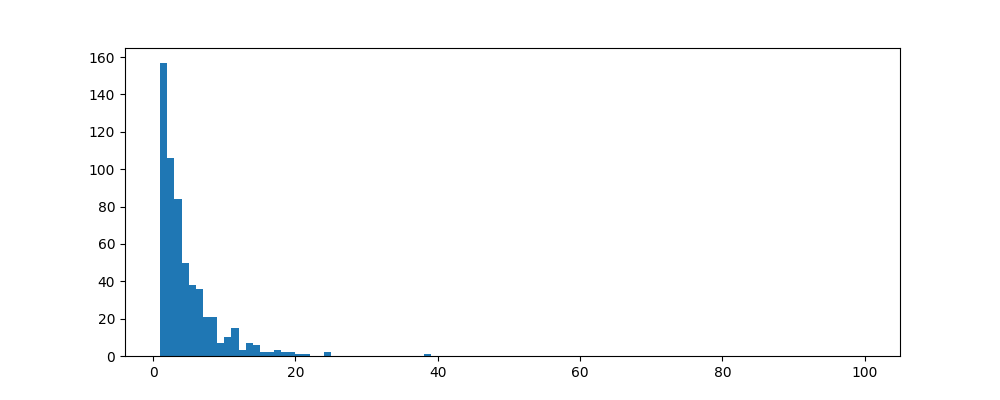

In [20]:
fig, ax = plt.subplots(figsize=(10,4))
counts, bins, bars = ax.hist(num_signedGames_all, bins=np.linspace(1,100,100))

In [21]:
print(f'On average players signed to {np.round(np.mean(num_signedGames_all),1)} games')

On average players signed to 4.2 games


In [22]:
print(f'Median of signed games {np.round(np.median(num_signedGames_all),1)} games')

Median of signed games 3.0 games


## What is the probability to be placed in a game as a function of number of signed games

In [23]:
signedGames_total = np.linspace(1,20,20)
chance_no_game = np.zeros((signedGames_total.shape))
for i,n in enumerate(signedGames_total):
    chance_no_game[i] = len(num_signedGames[num_signedGames==n])/len(num_signedGames_all[num_signedGames_all==n])

chance_no_game

array([0.40764331, 0.31132075, 0.17857143, 0.16      , 0.07894737,
       0.05555556, 0.0952381 , 0.14285714, 0.        , 0.        ,
       0.26666667, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ])

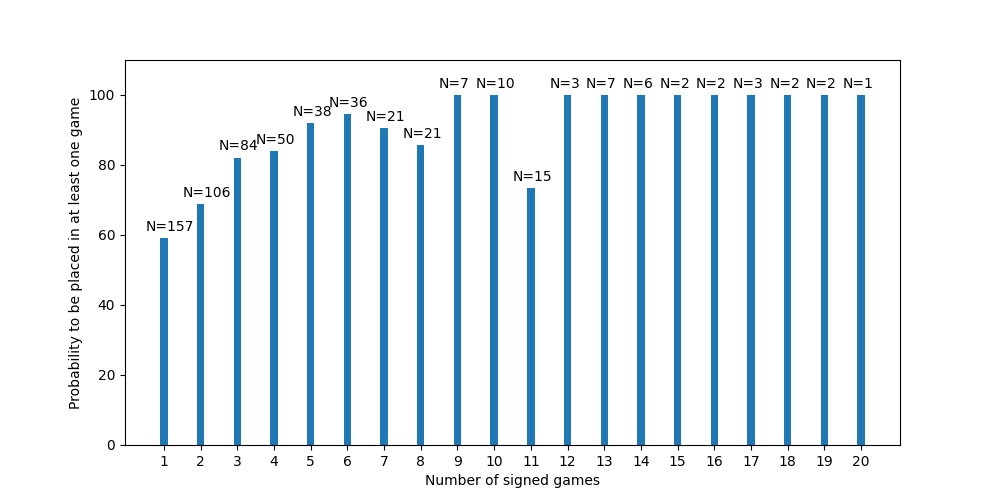

In [24]:
fig, ax = plt.subplots(figsize=(10,5))
ax.bar(signedGames_total, (1-chance_no_game)*100, width=0.2)
ax.set_xlabel('Number of signed games')
ax.set_ylabel('Probability to be placed in at least one game')
ax.set_xticks(np.linspace(1,20,20))
ax.set_ylim([0, 110])
for i,n in enumerate(signedGames_total):
    ax.text(n-0.5, (1-chance_no_game[i])*100 + 2, f'N={len(num_signedGames_all[num_signedGames_all==n])}')

## What's the distribution of entered games

In [25]:
signups_ttrpg.head()

,username,priority,time,message,game.gameId,count,createdAt,updatedAt
0,815795,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
1,129921,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
2,87501,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
3,987073,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z
4,375661,0,2022-07-30T09:00:00Z,<redacted>,p5344,28,2022-07-28T17:50:57.929Z,2022-07-30T08:50:55.253Z


In [26]:
users_signup_ttrpg = signups_ttrpg.username.unique()

In [27]:
num_enteredGames = []
for user in users_signup_ttrpg:
    num_enteredGames.append(signups_ttrpg[signups_ttrpg.username==user].shape[0])
np.mean(num_enteredGames)

1.6128472222222223

Text(0, 0.5, 'Number of players')

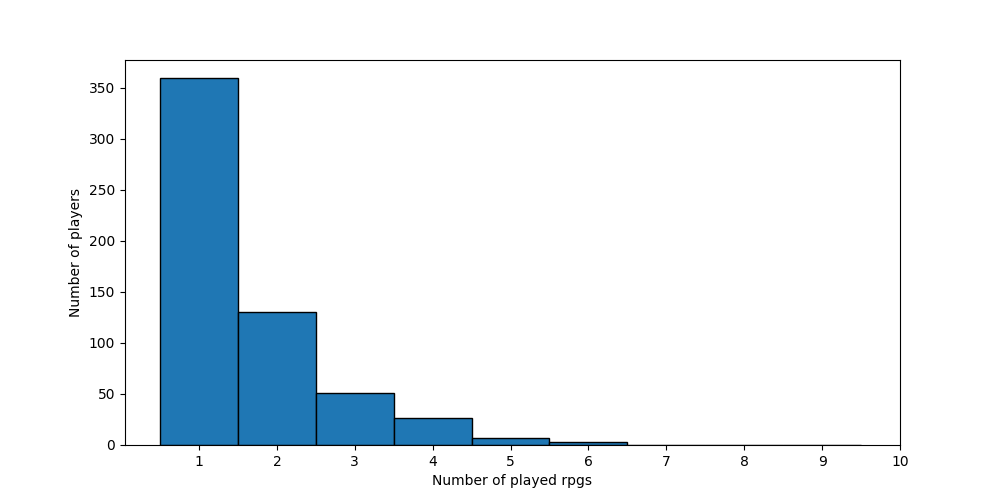

In [28]:
fig, ax = plt.subplots(figsize=(10,5))

counts, bins, bars = ax.hist(num_enteredGames, bins = np.linspace(1,10,10), linewidth=1, edgecolor='k')
ax.set_xticks(np.linspace(1,10,10)+0.5)
ax.set_xticklabels(np.linspace(1,10,10, dtype=int))
ax.set_xlabel('Number of played rpgs')
ax.set_ylabel('Number of players')

In [29]:
print(f'On average players played {np.round(np.mean(num_enteredGames),1)} games')
print(f'On median players played {np.round(np.median(num_enteredGames),1)} games')
max_games = int(np.max(num_enteredGames))
print(f'On maximum {int(counts[bins[:-1] == max_games][0])} players played {max_games} games')

On average players played 1.6 games
On median players played 1.0 games
On maximum 3 players played 6 games


### Find out how many games these 3 players signed for who played 6 games

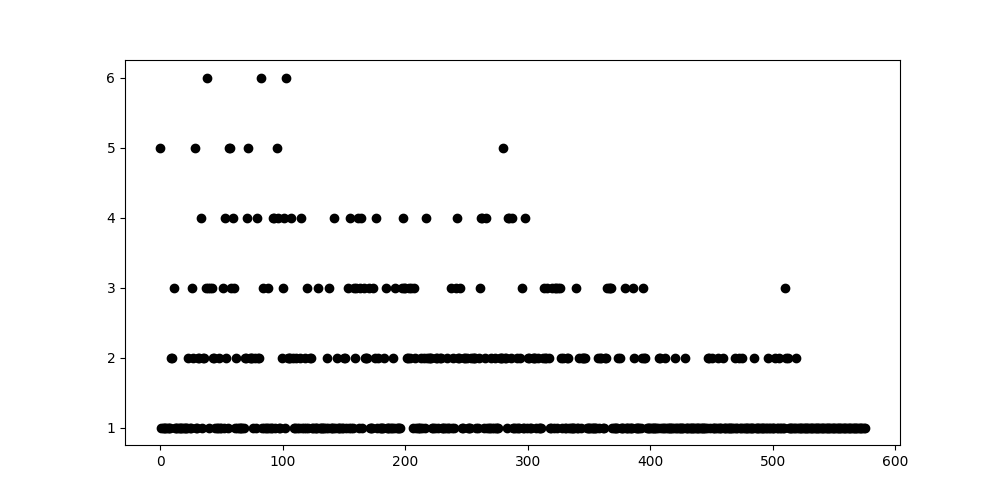

In [31]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(num_enteredGames,'ko')

In [44]:
ind_max = np.where(np.array(num_enteredGames)==6)
users_signup_ttrpg[ind_max]

array(['314827', '553492', '62531'], dtype=object)

In [45]:
for user in users_signup_ttrpg[ind_max]:
    print(signedGames_ttrpg[signedGames_ttrpg.username == user].shape[0])

14
13
20


## How many signedGames in each slot

In [51]:
start_times = np.unique(signups_ttrpg.time)
start_times = [pd.to_datetime(i) for i in start_times]

'Friday'

In [60]:
signups_ttrpg.loc['datetime'] = pd.to_datetime(signups_ttrpg.time)

In [69]:
signedGames_ttrpg['datetime'] = pd.to_datetime(signedGames_ttrpg.time)

In [72]:
num_signedGames_in_slot = []
for dt in signedGames_ttrpg['datetime'].unique():
    num_signedGames_in_slot.append(signedGames_ttrpg[signedGames_ttrpg['datetime'] == dt].shape[0])

In [74]:
num_signedGames_in_slot = num_signedGames_in_slot[:-1]
slots = signedGames_ttrpg['datetime'].unique()[:-1]

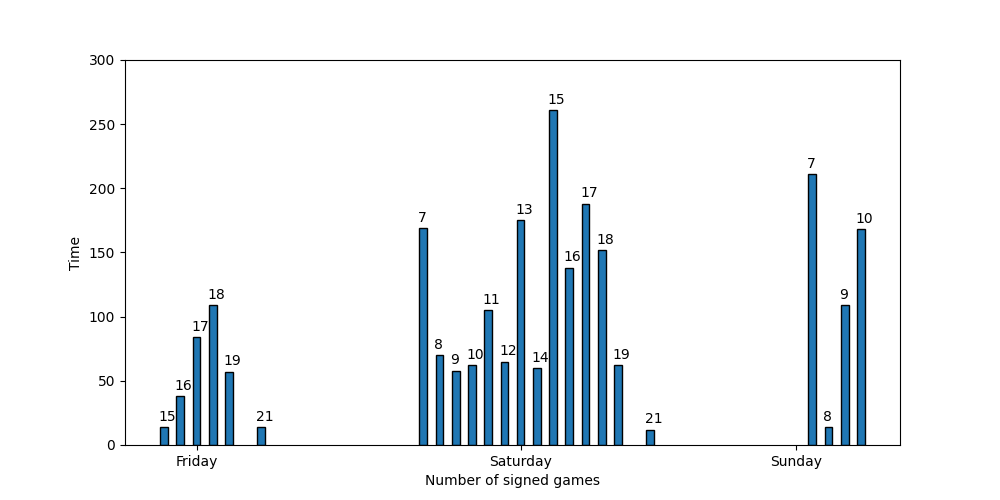

In [106]:
from datetime import timedelta, datetime


fig, ax = plt.subplots(figsize=(10, 5))

ax.bar(slots, num_signedGames_in_slot, width=0.02, edgecolor='k', linewidth=1)

ax.set_xlabel('Number of signed games')
ax.set_ylabel('Time')
ax.set_xticks([datetime(2022, 7, 29, 17, 0, 0), datetime(2022, 7, 30, 13, 0, 0), datetime(2022, 7, 31, 9, 0, 0)])
ax.xaxis.set_major_formatter(mdates.DateFormatter('%A'))
ax.set_ylim([0, 300])

for i, n in enumerate(num_signedGames_in_slot):
    ax.text(slots[i]-timedelta(minutes=20), n+5, str(slots[i].hour))
